# Decision Tree Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler,LabelBinarizer,OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("C:/Users/moham/Music/copper/copper/Scripts/Copper_Set.xlsx")

In [3]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### Data Preprocessing

In [5]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
for i in df.columns:
    print(i,len(df[i].unique()))

id 181672
item_date 253
quantity tons 181673
customer 1170
country 18
status 10
item type 7
application 31
thickness 595
width 1386
material_ref 16564
product_ref 33
delivery date 29
selling_price 9796


In [7]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df = df[df['status'].isin(['Won', 'Lost'])]

In [8]:
df.drop(columns = ["material_ref"], inplace = True)
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

### Visualization

In [10]:
df_c_numeric = ["quantity tons","country","application","thickness","width","selling_price"]
df_c_category = ["item type","status"]

53.79515161908884


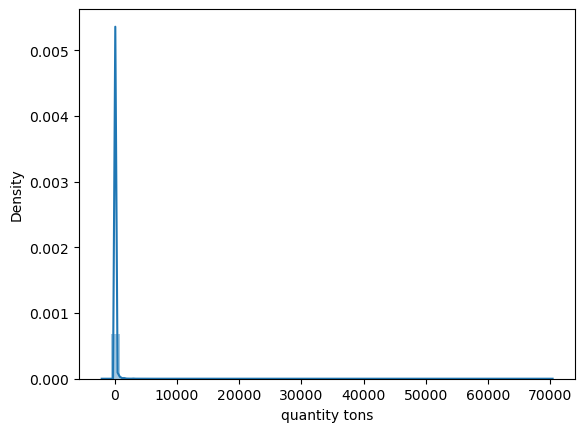

0.7083681433419178


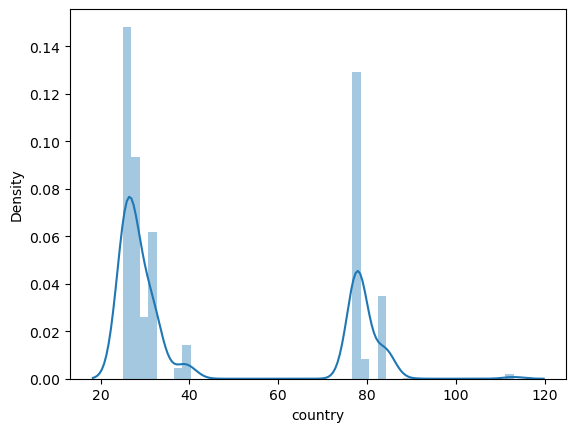

0.7509877955492849


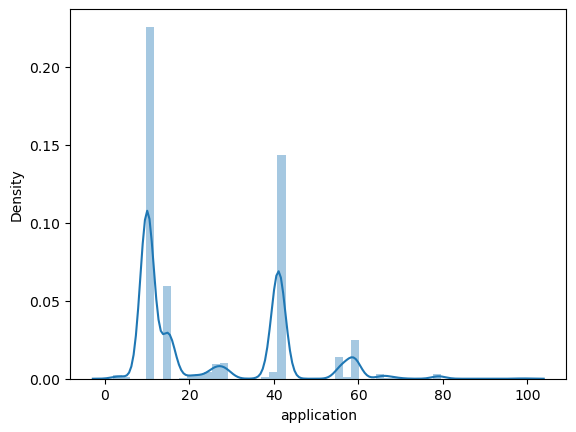

288.7021373752321


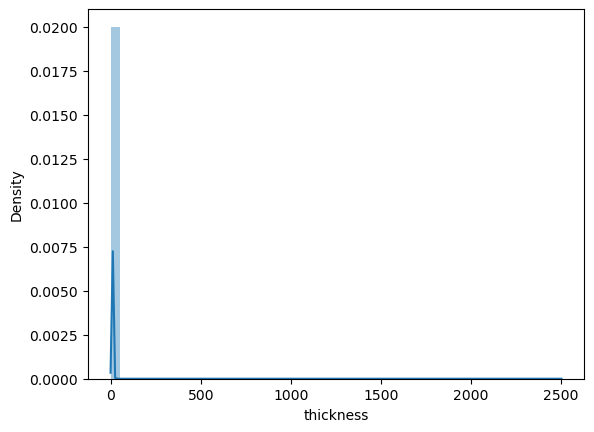

0.3527741333936263


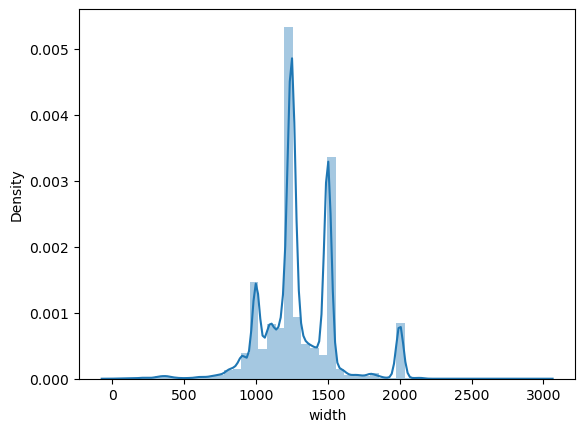

141.32687451443306


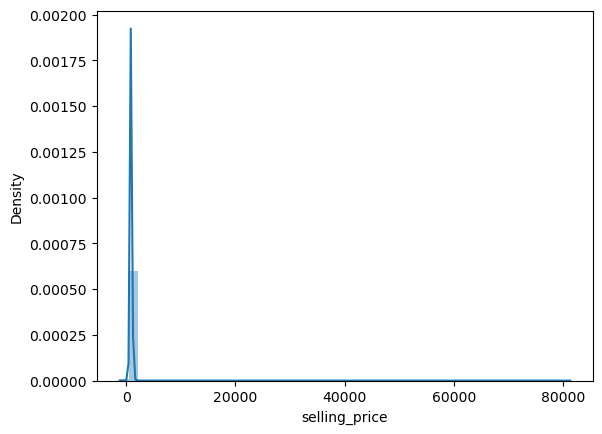

In [11]:
for i in df_c_numeric:
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [12]:
df.loc[df['quantity tons'] <= 0, 'quantity tons'] = np.nan
df.loc[df['thickness'] <= 0, 'thickness'] = np.nan
df.loc[df['selling_price'] <= 0, 'selling_price'] = np.nan

In [13]:
df.dropna(inplace=True)

0.3266224967345744


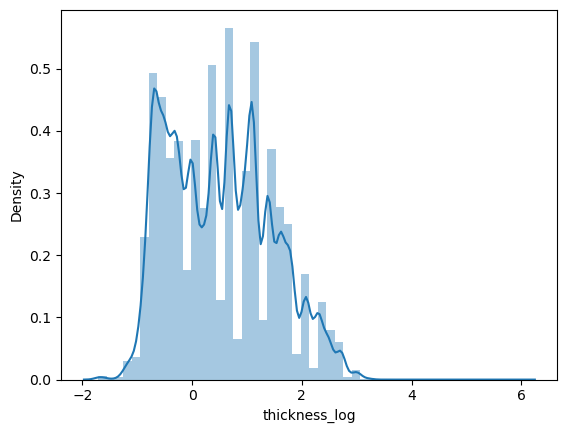

In [14]:
df['thickness_log'] = np.log(df['thickness'])
print(df["thickness_log"].skew())
sns.distplot(df["thickness_log"])
plt.show()

-0.050892466748281226


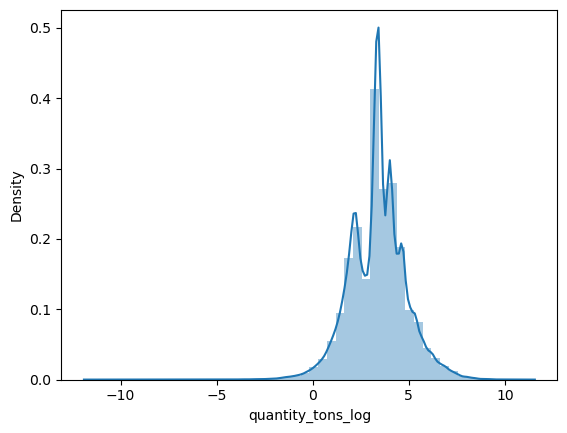

In [15]:
df['quantity_tons_log'] = np.log(df['quantity tons'])
print(df["quantity_tons_log"].skew())
sns.distplot(df["quantity_tons_log"])
plt.show()

-0.3143192292804818


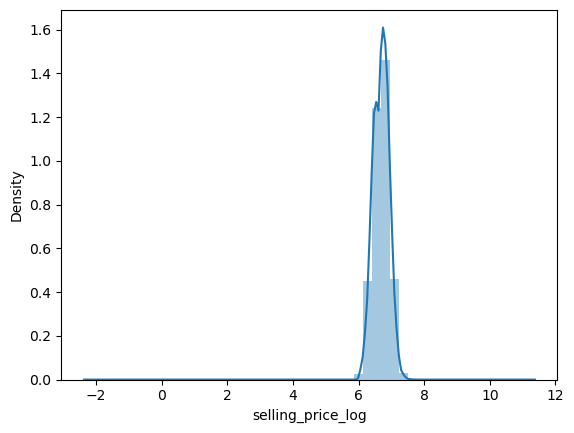

In [16]:
df['selling_price_log'] = np.log(df['selling_price'])
print(df["selling_price_log"].skew())
sns.distplot(df["selling_price_log"])
plt.show()

<Axes: >

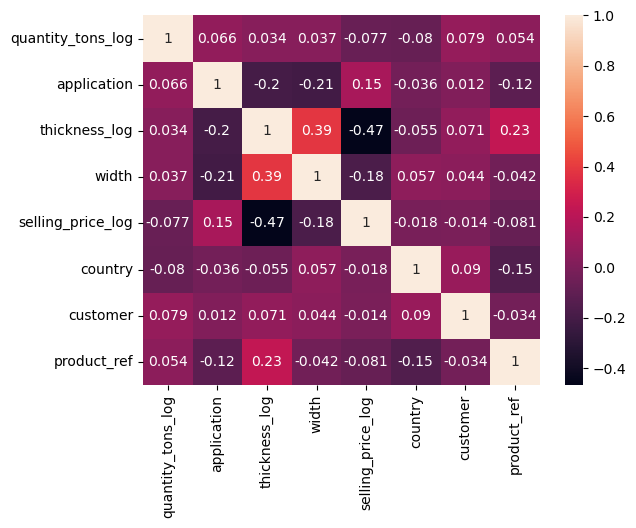

In [17]:
sns.heatmap(df[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr(),annot = True)

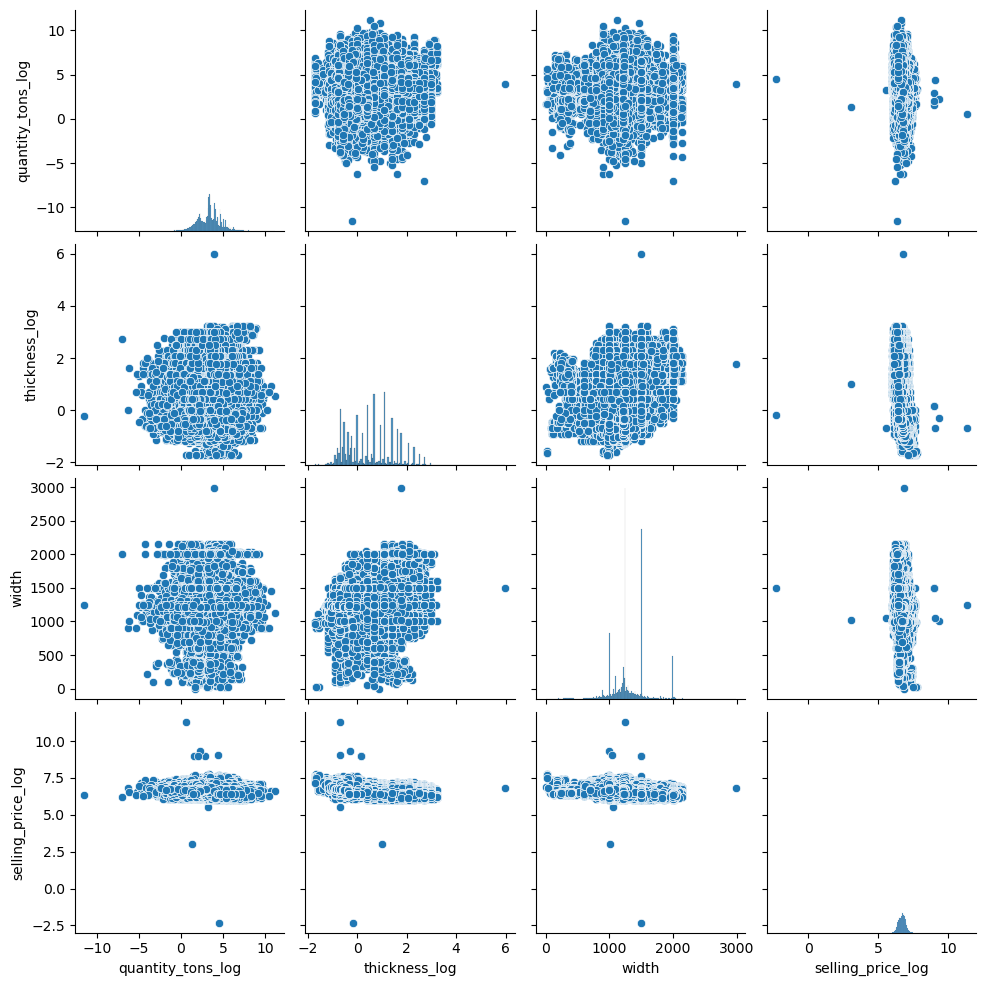

In [18]:
sns.pairplot(df[['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']])
plt.show()

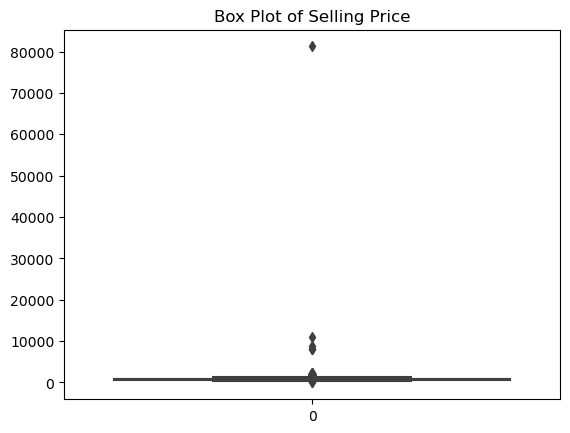

In [19]:
sns.boxplot(df['selling_price'])
plt.title('Box Plot of Selling Price')
plt.show()

In [20]:
Q1 = df['selling_price_log'].quantile(0.25)
Q3 = df['selling_price_log'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['selling_price_log'] < (Q1 - 1.5 * IQR)) | (df['selling_price_log'] > (Q3 + 1.5 * IQR)))]

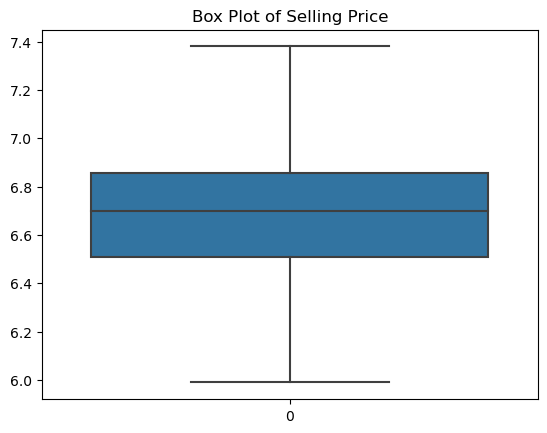

In [21]:
sns.boxplot(df['selling_price_log'])
plt.title('Box Plot of Selling Price')
plt.show()

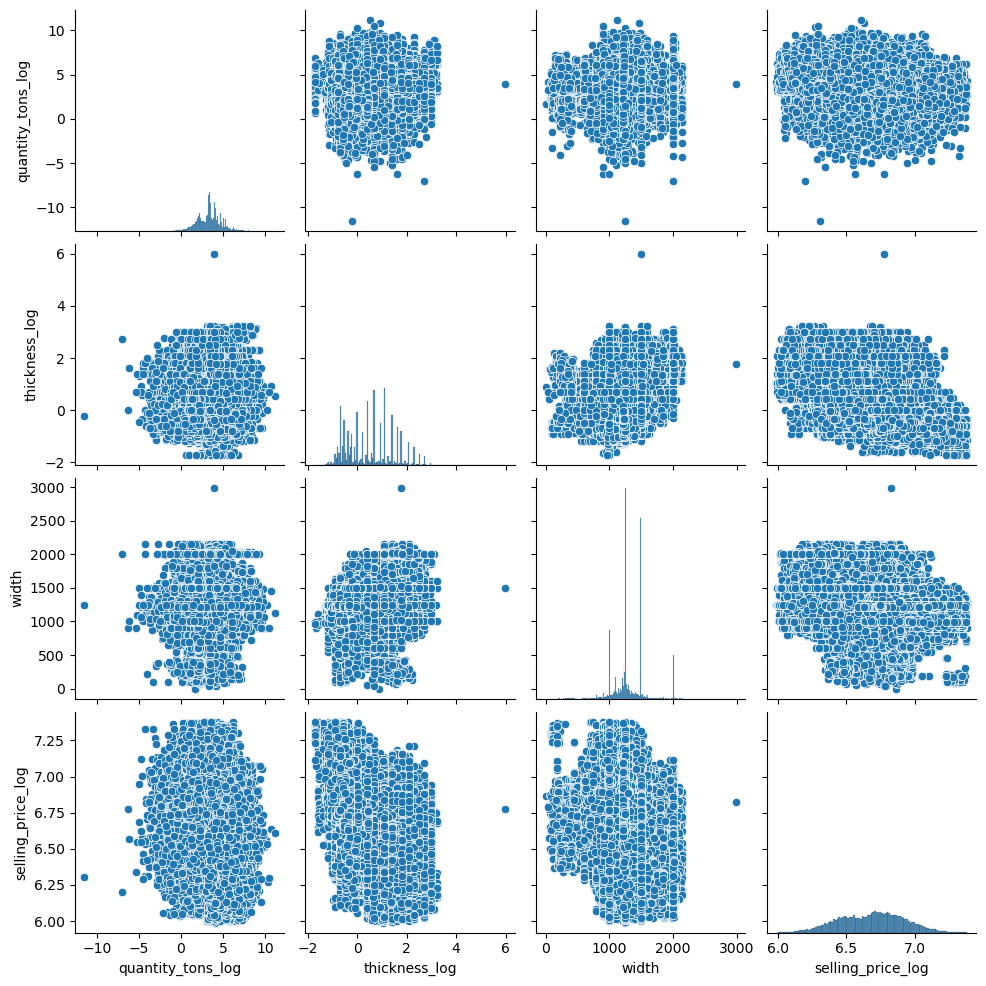

In [22]:
sns.pairplot(df[['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']])
plt.show()

### Machine Learning

In [23]:
Y = df['status']
X= df[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

In [24]:
# encoding the categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X[['item type']])
X_encoded = encoder.fit_transform(X[['item type']]).toarray()
label = LabelBinarizer()
label.fit(Y) 
y = label.fit_transform(Y)

In [25]:
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_encoded), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classification

In [27]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9146528193861927


In [29]:
matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{matrix}")

Confusion Matrix:
[[ 5677  1310]
 [ 1254 21801]]


In [30]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      6987
           1       0.94      0.95      0.94     23055

    accuracy                           0.91     30042
   macro avg       0.88      0.88      0.88     30042
weighted avg       0.91      0.91      0.91     30042



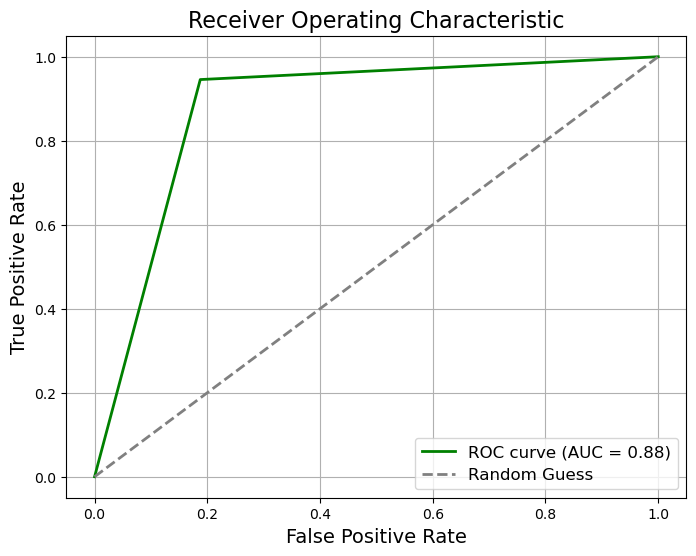

In [31]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label='Random Guess')
# Adding labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

In [32]:
testing = np.array([[np.log(768), np.log(1047), 41, np.log(0.80),1210,25.0,30202938,1668701718,'W']])
testing_encoded = encoder.transform(testing[:, [8]]).toarray()
testing = np.concatenate((testing[:, [0,1,2, 3, 4, 5, 6,7]], testing_encoded), axis=1)
testing = scaler.transform(testing)
result = classifier.predict(testing)
if result==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


### Saving the model

In [33]:
with open('classification_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)
with open('classification_standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('classification_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)